In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#chicago enerji kıyaslaması hakkında bir veri seti alalım.
df = pd.read_excel("Chicago_Energy_Benchmarking.xlsx")
df

,Data Year,ID,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Row_ID
0,2020,252064,1100 E 57th St,20.0,0.0,64028.0,2009.0,1.0,NaN,23847389.0,NaN,7438787.0,55940401.0,2408.0,3236.0,246.0,3299.0,11609.0,181.0,2020-252064
1,2020,232458,4800 - 4850 S Lake Park Ave,10.0,0.0,627680.0,1974.0,1.0,22.0,163976828.0,435374906.0,NaN,NaN,955.0,146.0,1003.0,1507.0,48717.0,78.0,2020-232458
2,2020,254616,330 N Green St,20.0,0.0,555524.0,2019.0,1.0,49.0,286064277.0,21999401.0,NaN,NaN,555.0,1483.0,567.0,1518.0,45814.0,82.0,2020-254616
3,2020,103812,400 W Superior St,30.0,0.0,130007.0,1998.0,1.0,61.0,64892813.0,14935232.0,NaN,NaN,614.0,1518.0,63.0,1548.0,10921.0,84.0,2020-103812
4,2020,254073,215 N. Aberdeen St.,40.0,0.0,83000.0,1908.0,1.0,100.0,16145823.0,8250066.0,NaN,NaN,294.0,649.0,296.0,643.0,2958.0,36.0,2020-254073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,7931 S Honore St,10.0,0.0,77483.0,1957.0,1.0,25.0,25443455.0,48478905.0,0.0,0.0,954.0,1576.0,993.0,1618.0,5926.0,76.0,2022-251598
24887,2022,159799,6101 N Sheridan Road,40.0,0.0,150000.0,1928.0,1.0,85.0,20195641.0,72546406.0,0.0,0.0,618.0,885.0,645.0,913.0,6513.0,43.0,2022-159799
24888,2022,105488,5600 N SHERIDAN RD,20.0,0.0,128387.0,1965.0,1.0,25.0,2801125.0,125285887.0,0.0,0.0,1243.0,1703.0,1299.0,1752.0,10344.0,84.0,2022-105488
24889,2022,251565,8306 S St Lawrence Ave,40.0,0.0,101627.0,1929.0,1.0,91.0,733952.0,46792699.0,0.0,0.0,533.0,686.0,552.0,697.0,3452.0,34.0,2022-251565


In [6]:
#boş değerler var mı öğrenmek için bilgi edinelim.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24891 entries, 0 to 24890
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Data Year                                   24891 non-null  int64  
 1   ID                                          24891 non-null  int64  
 2   Address                                     24891 non-null  object 
 3   Chicago Energy Rating                       16321 non-null  float64
 4   Exempt From Chicago Energy Rating           17613 non-null  float64
 5   Gross Floor Area - Buildings (sq ft)        23520 non-null  float64
 6   Year Built                                  20713 non-null  float64
 7   # of Buildings                              21291 non-null  float64
 8   ENERGY STAR Score                           17386 non-null  float64
 9   Electricity Use (kBtu)                      20429 non-null  float64
 10  Natural Ga

In [7]:
df.isnull().sum()

Data Year                                         0
ID                                                0
Address                                           0
Chicago Energy Rating                          8570
Exempt From Chicago Energy Rating              7278
Gross Floor Area - Buildings (sq ft)           1371
Year Built                                     4178
# of Buildings                                 3600
ENERGY STAR Score                              7505
Electricity Use (kBtu)                         4462
Natural Gas Use (kBtu)                         5777
District Steam Use (kBtu)                     19182
District Chilled Water Use (kBtu)             19054
Site EUI (kBtu/sq ft)                          4604
Source EUI (kBtu/sq ft)                        5463
Weather Normalized Site EUI (kBtu/sq ft)       5714
Weather Normalized Source EUI (kBtu/sq ft)     7074
Total GHG Emissions (Metric Tons CO2e)         5749
GHG Intensity (kg CO2e/sq ft)                  5754
Row_ID      

array([[<Axes: title={'center': 'Data Year'}>,
        <Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Chicago Energy Rating'}>,
        <Axes: title={'center': 'Exempt From Chicago Energy Rating'}>],
       [<Axes: title={'center': 'Gross Floor Area - Buildings (sq ft)'}>,
        <Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': '# of Buildings'}>,
        <Axes: title={'center': 'ENERGY STAR Score'}>],
       [<Axes: title={'center': 'Electricity Use (kBtu)'}>,
        <Axes: title={'center': 'Natural Gas Use (kBtu)'}>,
        <Axes: title={'center': 'District Steam Use (kBtu)'}>,
        <Axes: title={'center': 'District Chilled Water Use (kBtu)'}>],
       [<Axes: title={'center': 'Site EUI (kBtu/sq ft)'}>,
        <Axes: title={'center': 'Source EUI (kBtu/sq ft)'}>,
        <Axes: title={'center': 'Weather Normalized Site EUI (kBtu/sq ft)'}>,
        <Axes: title={'center': 'Weather Normalized Source EUI (kBtu/sq ft)'}>],
       [<Axes: tit

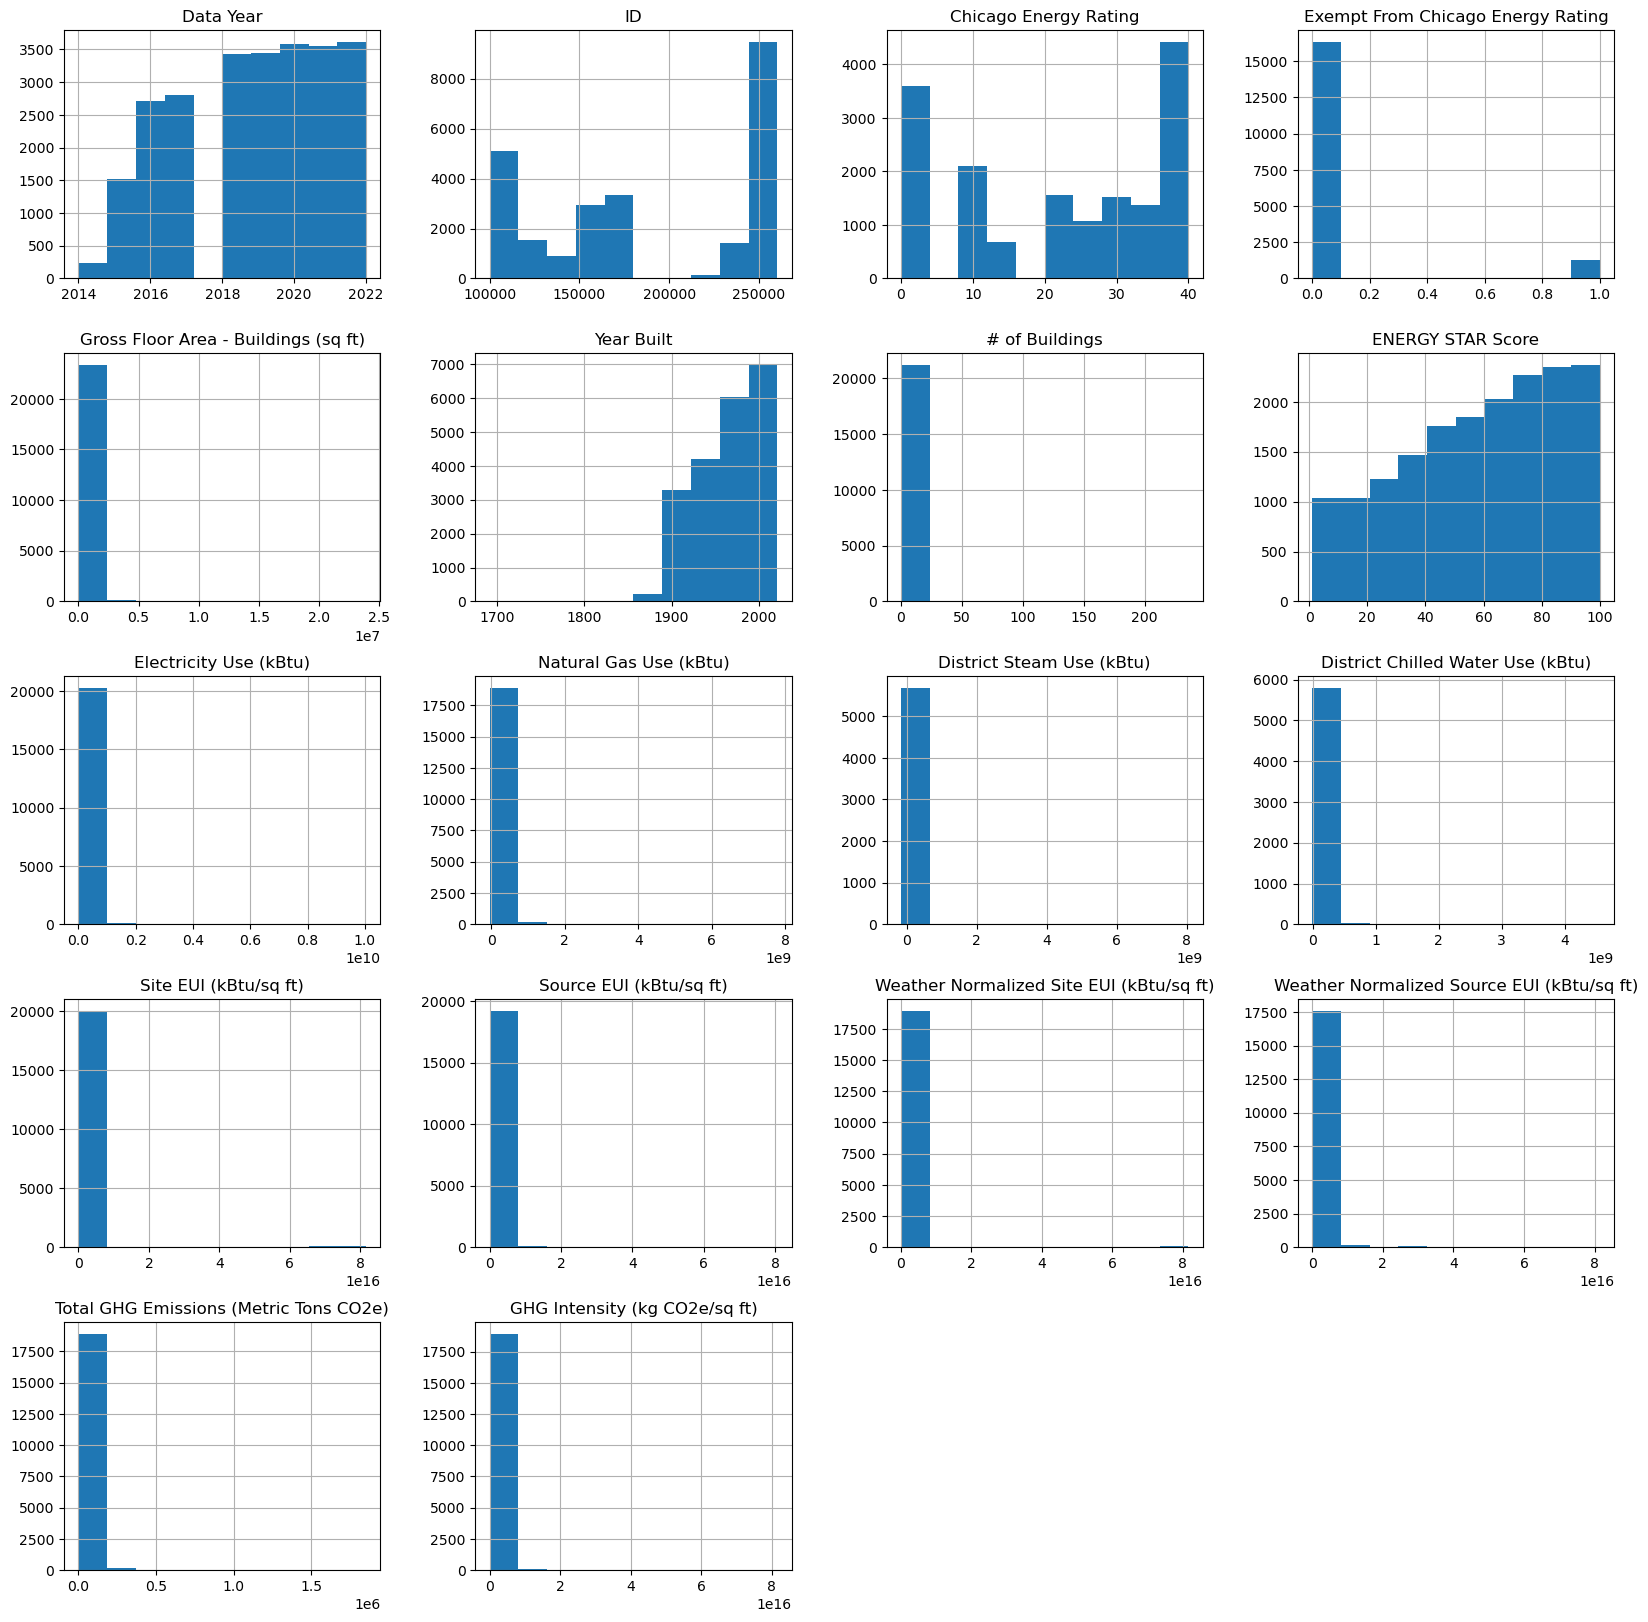

In [8]:
#Boş satırları hangi değerlerle dolduracağımızı belirlemek için histogram grafiğine bakalım.
df.hist(figsize=(20,20))

In [9]:
#Boş değerlerin sağa ve sola çarpık olan sütunları medyan, normal dağılım gösterenleri modla dolduralım.

In [10]:
df["Chicago Energy Rating"].fillna(df["Chicago Energy Rating"].mean() ,inplace=True)
df

,Data Year,ID,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Row_ID
0,2020,252064,1100 E 57th St,20.0,0.0,64028.0,2009.0,1.0,NaN,23847389.0,NaN,7438787.0,55940401.0,2408.0,3236.0,246.0,3299.0,11609.0,181.0,2020-252064
1,2020,232458,4800 - 4850 S Lake Park Ave,10.0,0.0,627680.0,1974.0,1.0,22.0,163976828.0,435374906.0,NaN,NaN,955.0,146.0,1003.0,1507.0,48717.0,78.0,2020-232458
2,2020,254616,330 N Green St,20.0,0.0,555524.0,2019.0,1.0,49.0,286064277.0,21999401.0,NaN,NaN,555.0,1483.0,567.0,1518.0,45814.0,82.0,2020-254616
3,2020,103812,400 W Superior St,30.0,0.0,130007.0,1998.0,1.0,61.0,64892813.0,14935232.0,NaN,NaN,614.0,1518.0,63.0,1548.0,10921.0,84.0,2020-103812
4,2020,254073,215 N. Aberdeen St.,40.0,0.0,83000.0,1908.0,1.0,100.0,16145823.0,8250066.0,NaN,NaN,294.0,649.0,296.0,643.0,2958.0,36.0,2020-254073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,7931 S Honore St,10.0,0.0,77483.0,1957.0,1.0,25.0,25443455.0,48478905.0,0.0,0.0,954.0,1576.0,993.0,1618.0,5926.0,76.0,2022-251598
24887,2022,159799,6101 N Sheridan Road,40.0,0.0,150000.0,1928.0,1.0,85.0,20195641.0,72546406.0,0.0,0.0,618.0,885.0,645.0,913.0,6513.0,43.0,2022-159799
24888,2022,105488,5600 N SHERIDAN RD,20.0,0.0,128387.0,1965.0,1.0,25.0,2801125.0,125285887.0,0.0,0.0,1243.0,1703.0,1299.0,1752.0,10344.0,84.0,2022-105488
24889,2022,251565,8306 S St Lawrence Ave,40.0,0.0,101627.0,1929.0,1.0,91.0,733952.0,46792699.0,0.0,0.0,533.0,686.0,552.0,697.0,3452.0,34.0,2022-251565


In [11]:
df["Exempt From Chicago Energy Rating"].fillna(df["Exempt From Chicago Energy Rating"].median() ,inplace=True)
df

,Data Year,ID,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Row_ID
0,2020,252064,1100 E 57th St,20.0,0.0,64028.0,2009.0,1.0,NaN,23847389.0,NaN,7438787.0,55940401.0,2408.0,3236.0,246.0,3299.0,11609.0,181.0,2020-252064
1,2020,232458,4800 - 4850 S Lake Park Ave,10.0,0.0,627680.0,1974.0,1.0,22.0,163976828.0,435374906.0,NaN,NaN,955.0,146.0,1003.0,1507.0,48717.0,78.0,2020-232458
2,2020,254616,330 N Green St,20.0,0.0,555524.0,2019.0,1.0,49.0,286064277.0,21999401.0,NaN,NaN,555.0,1483.0,567.0,1518.0,45814.0,82.0,2020-254616
3,2020,103812,400 W Superior St,30.0,0.0,130007.0,1998.0,1.0,61.0,64892813.0,14935232.0,NaN,NaN,614.0,1518.0,63.0,1548.0,10921.0,84.0,2020-103812
4,2020,254073,215 N. Aberdeen St.,40.0,0.0,83000.0,1908.0,1.0,100.0,16145823.0,8250066.0,NaN,NaN,294.0,649.0,296.0,643.0,2958.0,36.0,2020-254073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,7931 S Honore St,10.0,0.0,77483.0,1957.0,1.0,25.0,25443455.0,48478905.0,0.0,0.0,954.0,1576.0,993.0,1618.0,5926.0,76.0,2022-251598
24887,2022,159799,6101 N Sheridan Road,40.0,0.0,150000.0,1928.0,1.0,85.0,20195641.0,72546406.0,0.0,0.0,618.0,885.0,645.0,913.0,6513.0,43.0,2022-159799
24888,2022,105488,5600 N SHERIDAN RD,20.0,0.0,128387.0,1965.0,1.0,25.0,2801125.0,125285887.0,0.0,0.0,1243.0,1703.0,1299.0,1752.0,10344.0,84.0,2022-105488
24889,2022,251565,8306 S St Lawrence Ave,40.0,0.0,101627.0,1929.0,1.0,91.0,733952.0,46792699.0,0.0,0.0,533.0,686.0,552.0,697.0,3452.0,34.0,2022-251565


In [12]:
df["Gross Floor Area - Buildings (sq ft)"].fillna(df["Gross Floor Area - Buildings (sq ft)"].median() ,inplace=True)
df

,Data Year,ID,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Row_ID
0,2020,252064,1100 E 57th St,20.0,0.0,64028.0,2009.0,1.0,NaN,23847389.0,NaN,7438787.0,55940401.0,2408.0,3236.0,246.0,3299.0,11609.0,181.0,2020-252064
1,2020,232458,4800 - 4850 S Lake Park Ave,10.0,0.0,627680.0,1974.0,1.0,22.0,163976828.0,435374906.0,NaN,NaN,955.0,146.0,1003.0,1507.0,48717.0,78.0,2020-232458
2,2020,254616,330 N Green St,20.0,0.0,555524.0,2019.0,1.0,49.0,286064277.0,21999401.0,NaN,NaN,555.0,1483.0,567.0,1518.0,45814.0,82.0,2020-254616
3,2020,103812,400 W Superior St,30.0,0.0,130007.0,1998.0,1.0,61.0,64892813.0,14935232.0,NaN,NaN,614.0,1518.0,63.0,1548.0,10921.0,84.0,2020-103812
4,2020,254073,215 N. Aberdeen St.,40.0,0.0,83000.0,1908.0,1.0,100.0,16145823.0,8250066.0,NaN,NaN,294.0,649.0,296.0,643.0,2958.0,36.0,2020-254073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,7931 S Honore St,10.0,0.0,77483.0,1957.0,1.0,25.0,25443455.0,48478905.0,0.0,0.0,954.0,1576.0,993.0,1618.0,5926.0,76.0,2022-251598
24887,2022,159799,6101 N Sheridan Road,40.0,0.0,150000.0,1928.0,1.0,85.0,20195641.0,72546406.0,0.0,0.0,618.0,885.0,645.0,913.0,6513.0,43.0,2022-159799
24888,2022,105488,5600 N SHERIDAN RD,20.0,0.0,128387.0,1965.0,1.0,25.0,2801125.0,125285887.0,0.0,0.0,1243.0,1703.0,1299.0,1752.0,10344.0,84.0,2022-105488
24889,2022,251565,8306 S St Lawrence Ave,40.0,0.0,101627.0,1929.0,1.0,91.0,733952.0,46792699.0,0.0,0.0,533.0,686.0,552.0,697.0,3452.0,34.0,2022-251565


In [13]:
df["Year Built"].fillna(df["Year Built"].median() ,inplace=True)
df

,Data Year,ID,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Row_ID
0,2020,252064,1100 E 57th St,20.0,0.0,64028.0,2009.0,1.0,NaN,23847389.0,NaN,7438787.0,55940401.0,2408.0,3236.0,246.0,3299.0,11609.0,181.0,2020-252064
1,2020,232458,4800 - 4850 S Lake Park Ave,10.0,0.0,627680.0,1974.0,1.0,22.0,163976828.0,435374906.0,NaN,NaN,955.0,146.0,1003.0,1507.0,48717.0,78.0,2020-232458
2,2020,254616,330 N Green St,20.0,0.0,555524.0,2019.0,1.0,49.0,286064277.0,21999401.0,NaN,NaN,555.0,1483.0,567.0,1518.0,45814.0,82.0,2020-254616
3,2020,103812,400 W Superior St,30.0,0.0,130007.0,1998.0,1.0,61.0,64892813.0,14935232.0,NaN,NaN,614.0,1518.0,63.0,1548.0,10921.0,84.0,2020-103812
4,2020,254073,215 N. Aberdeen St.,40.0,0.0,83000.0,1908.0,1.0,100.0,16145823.0,8250066.0,NaN,NaN,294.0,649.0,296.0,643.0,2958.0,36.0,2020-254073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,7931 S Honore St,10.0,0.0,77483.0,1957.0,1.0,25.0,25443455.0,48478905.0,0.0,0.0,954.0,1576.0,993.0,1618.0,5926.0,76.0,2022-251598
24887,2022,159799,6101 N Sheridan Road,40.0,0.0,150000.0,1928.0,1.0,85.0,20195641.0,72546406.0,0.0,0.0,618.0,885.0,645.0,913.0,6513.0,43.0,2022-159799
24888,2022,105488,5600 N SHERIDAN RD,20.0,0.0,128387.0,1965.0,1.0,25.0,2801125.0,125285887.0,0.0,0.0,1243.0,1703.0,1299.0,1752.0,10344.0,84.0,2022-105488
24889,2022,251565,8306 S St Lawrence Ave,40.0,0.0,101627.0,1929.0,1.0,91.0,733952.0,46792699.0,0.0,0.0,533.0,686.0,552.0,697.0,3452.0,34.0,2022-251565


In [14]:
df["# of Buildings"].fillna(df["# of Buildings"].median() ,inplace=True)
df

,Data Year,ID,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Row_ID
0,2020,252064,1100 E 57th St,20.0,0.0,64028.0,2009.0,1.0,NaN,23847389.0,NaN,7438787.0,55940401.0,2408.0,3236.0,246.0,3299.0,11609.0,181.0,2020-252064
1,2020,232458,4800 - 4850 S Lake Park Ave,10.0,0.0,627680.0,1974.0,1.0,22.0,163976828.0,435374906.0,NaN,NaN,955.0,146.0,1003.0,1507.0,48717.0,78.0,2020-232458
2,2020,254616,330 N Green St,20.0,0.0,555524.0,2019.0,1.0,49.0,286064277.0,21999401.0,NaN,NaN,555.0,1483.0,567.0,1518.0,45814.0,82.0,2020-254616
3,2020,103812,400 W Superior St,30.0,0.0,130007.0,1998.0,1.0,61.0,64892813.0,14935232.0,NaN,NaN,614.0,1518.0,63.0,1548.0,10921.0,84.0,2020-103812
4,2020,254073,215 N. Aberdeen St.,40.0,0.0,83000.0,1908.0,1.0,100.0,16145823.0,8250066.0,NaN,NaN,294.0,649.0,296.0,643.0,2958.0,36.0,2020-254073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,7931 S Honore St,10.0,0.0,77483.0,1957.0,1.0,25.0,25443455.0,48478905.0,0.0,0.0,954.0,1576.0,993.0,1618.0,5926.0,76.0,2022-251598
24887,2022,159799,6101 N Sheridan Road,40.0,0.0,150000.0,1928.0,1.0,85.0,20195641.0,72546406.0,0.0,0.0,618.0,885.0,645.0,913.0,6513.0,43.0,2022-159799
24888,2022,105488,5600 N SHERIDAN RD,20.0,0.0,128387.0,1965.0,1.0,25.0,2801125.0,125285887.0,0.0,0.0,1243.0,1703.0,1299.0,1752.0,10344.0,84.0,2022-105488
24889,2022,251565,8306 S St Lawrence Ave,40.0,0.0,101627.0,1929.0,1.0,91.0,733952.0,46792699.0,0.0,0.0,533.0,686.0,552.0,697.0,3452.0,34.0,2022-251565


In [15]:
df["ENERGY STAR Score"].fillna(df["ENERGY STAR Score"].median() ,inplace=True)
df

,Data Year,ID,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Row_ID
0,2020,252064,1100 E 57th St,20.0,0.0,64028.0,2009.0,1.0,62.0,23847389.0,NaN,7438787.0,55940401.0,2408.0,3236.0,246.0,3299.0,11609.0,181.0,2020-252064
1,2020,232458,4800 - 4850 S Lake Park Ave,10.0,0.0,627680.0,1974.0,1.0,22.0,163976828.0,435374906.0,NaN,NaN,955.0,146.0,1003.0,1507.0,48717.0,78.0,2020-232458
2,2020,254616,330 N Green St,20.0,0.0,555524.0,2019.0,1.0,49.0,286064277.0,21999401.0,NaN,NaN,555.0,1483.0,567.0,1518.0,45814.0,82.0,2020-254616
3,2020,103812,400 W Superior St,30.0,0.0,130007.0,1998.0,1.0,61.0,64892813.0,14935232.0,NaN,NaN,614.0,1518.0,63.0,1548.0,10921.0,84.0,2020-103812
4,2020,254073,215 N. Aberdeen St.,40.0,0.0,83000.0,1908.0,1.0,100.0,16145823.0,8250066.0,NaN,NaN,294.0,649.0,296.0,643.0,2958.0,36.0,2020-254073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,7931 S Honore St,10.0,0.0,77483.0,1957.0,1.0,25.0,25443455.0,48478905.0,0.0,0.0,954.0,1576.0,993.0,1618.0,5926.0,76.0,2022-251598
24887,2022,159799,6101 N Sheridan Road,40.0,0.0,150000.0,1928.0,1.0,85.0,20195641.0,72546406.0,0.0,0.0,618.0,885.0,645.0,913.0,6513.0,43.0,2022-159799
24888,2022,105488,5600 N SHERIDAN RD,20.0,0.0,128387.0,1965.0,1.0,25.0,2801125.0,125285887.0,0.0,0.0,1243.0,1703.0,1299.0,1752.0,10344.0,84.0,2022-105488
24889,2022,251565,8306 S St Lawrence Ave,40.0,0.0,101627.0,1929.0,1.0,91.0,733952.0,46792699.0,0.0,0.0,533.0,686.0,552.0,697.0,3452.0,34.0,2022-251565


In [16]:
df["Electricity Use (kBtu)"].fillna(df["Electricity Use (kBtu)"].median() ,inplace=True)
df

,Data Year,ID,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Row_ID
0,2020,252064,1100 E 57th St,20.0,0.0,64028.0,2009.0,1.0,62.0,23847389.0,NaN,7438787.0,55940401.0,2408.0,3236.0,246.0,3299.0,11609.0,181.0,2020-252064
1,2020,232458,4800 - 4850 S Lake Park Ave,10.0,0.0,627680.0,1974.0,1.0,22.0,163976828.0,435374906.0,NaN,NaN,955.0,146.0,1003.0,1507.0,48717.0,78.0,2020-232458
2,2020,254616,330 N Green St,20.0,0.0,555524.0,2019.0,1.0,49.0,286064277.0,21999401.0,NaN,NaN,555.0,1483.0,567.0,1518.0,45814.0,82.0,2020-254616
3,2020,103812,400 W Superior St,30.0,0.0,130007.0,1998.0,1.0,61.0,64892813.0,14935232.0,NaN,NaN,614.0,1518.0,63.0,1548.0,10921.0,84.0,2020-103812
4,2020,254073,215 N. Aberdeen St.,40.0,0.0,83000.0,1908.0,1.0,100.0,16145823.0,8250066.0,NaN,NaN,294.0,649.0,296.0,643.0,2958.0,36.0,2020-254073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,7931 S Honore St,10.0,0.0,77483.0,1957.0,1.0,25.0,25443455.0,48478905.0,0.0,0.0,954.0,1576.0,993.0,1618.0,5926.0,76.0,2022-251598
24887,2022,159799,6101 N Sheridan Road,40.0,0.0,150000.0,1928.0,1.0,85.0,20195641.0,72546406.0,0.0,0.0,618.0,885.0,645.0,913.0,6513.0,43.0,2022-159799
24888,2022,105488,5600 N SHERIDAN RD,20.0,0.0,128387.0,1965.0,1.0,25.0,2801125.0,125285887.0,0.0,0.0,1243.0,1703.0,1299.0,1752.0,10344.0,84.0,2022-105488
24889,2022,251565,8306 S St Lawrence Ave,40.0,0.0,101627.0,1929.0,1.0,91.0,733952.0,46792699.0,0.0,0.0,533.0,686.0,552.0,697.0,3452.0,34.0,2022-251565


In [17]:
df["Natural Gas Use (kBtu)"].fillna(df["Natural Gas Use (kBtu)"].median() ,inplace=True)
df

,Data Year,ID,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Row_ID
0,2020,252064,1100 E 57th St,20.0,0.0,64028.0,2009.0,1.0,62.0,23847389.0,37559626.0,7438787.0,55940401.0,2408.0,3236.0,246.0,3299.0,11609.0,181.0,2020-252064
1,2020,232458,4800 - 4850 S Lake Park Ave,10.0,0.0,627680.0,1974.0,1.0,22.0,163976828.0,435374906.0,NaN,NaN,955.0,146.0,1003.0,1507.0,48717.0,78.0,2020-232458
2,2020,254616,330 N Green St,20.0,0.0,555524.0,2019.0,1.0,49.0,286064277.0,21999401.0,NaN,NaN,555.0,1483.0,567.0,1518.0,45814.0,82.0,2020-254616
3,2020,103812,400 W Superior St,30.0,0.0,130007.0,1998.0,1.0,61.0,64892813.0,14935232.0,NaN,NaN,614.0,1518.0,63.0,1548.0,10921.0,84.0,2020-103812
4,2020,254073,215 N. Aberdeen St.,40.0,0.0,83000.0,1908.0,1.0,100.0,16145823.0,8250066.0,NaN,NaN,294.0,649.0,296.0,643.0,2958.0,36.0,2020-254073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,7931 S Honore St,10.0,0.0,77483.0,1957.0,1.0,25.0,25443455.0,48478905.0,0.0,0.0,954.0,1576.0,993.0,1618.0,5926.0,76.0,2022-251598
24887,2022,159799,6101 N Sheridan Road,40.0,0.0,150000.0,1928.0,1.0,85.0,20195641.0,72546406.0,0.0,0.0,618.0,885.0,645.0,913.0,6513.0,43.0,2022-159799
24888,2022,105488,5600 N SHERIDAN RD,20.0,0.0,128387.0,1965.0,1.0,25.0,2801125.0,125285887.0,0.0,0.0,1243.0,1703.0,1299.0,1752.0,10344.0,84.0,2022-105488
24889,2022,251565,8306 S St Lawrence Ave,40.0,0.0,101627.0,1929.0,1.0,91.0,733952.0,46792699.0,0.0,0.0,533.0,686.0,552.0,697.0,3452.0,34.0,2022-251565


In [18]:
df["District Steam Use (kBtu)"].fillna(df["District Steam Use (kBtu)"].median() ,inplace=True)
df

,Data Year,ID,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Row_ID
0,2020,252064,1100 E 57th St,20.0,0.0,64028.0,2009.0,1.0,62.0,23847389.0,37559626.0,7438787.0,55940401.0,2408.0,3236.0,246.0,3299.0,11609.0,181.0,2020-252064
1,2020,232458,4800 - 4850 S Lake Park Ave,10.0,0.0,627680.0,1974.0,1.0,22.0,163976828.0,435374906.0,0.0,NaN,955.0,146.0,1003.0,1507.0,48717.0,78.0,2020-232458
2,2020,254616,330 N Green St,20.0,0.0,555524.0,2019.0,1.0,49.0,286064277.0,21999401.0,0.0,NaN,555.0,1483.0,567.0,1518.0,45814.0,82.0,2020-254616
3,2020,103812,400 W Superior St,30.0,0.0,130007.0,1998.0,1.0,61.0,64892813.0,14935232.0,0.0,NaN,614.0,1518.0,63.0,1548.0,10921.0,84.0,2020-103812
4,2020,254073,215 N. Aberdeen St.,40.0,0.0,83000.0,1908.0,1.0,100.0,16145823.0,8250066.0,0.0,NaN,294.0,649.0,296.0,643.0,2958.0,36.0,2020-254073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,7931 S Honore St,10.0,0.0,77483.0,1957.0,1.0,25.0,25443455.0,48478905.0,0.0,0.0,954.0,1576.0,993.0,1618.0,5926.0,76.0,2022-251598
24887,2022,159799,6101 N Sheridan Road,40.0,0.0,150000.0,1928.0,1.0,85.0,20195641.0,72546406.0,0.0,0.0,618.0,885.0,645.0,913.0,6513.0,43.0,2022-159799
24888,2022,105488,5600 N SHERIDAN RD,20.0,0.0,128387.0,1965.0,1.0,25.0,2801125.0,125285887.0,0.0,0.0,1243.0,1703.0,1299.0,1752.0,10344.0,84.0,2022-105488
24889,2022,251565,8306 S St Lawrence Ave,40.0,0.0,101627.0,1929.0,1.0,91.0,733952.0,46792699.0,0.0,0.0,533.0,686.0,552.0,697.0,3452.0,34.0,2022-251565


In [19]:
df["District Chilled Water Use (kBtu)"].fillna(df["District Chilled Water Use (kBtu)"].median() ,inplace=True)
df

,Data Year,ID,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Row_ID
0,2020,252064,1100 E 57th St,20.0,0.0,64028.0,2009.0,1.0,62.0,23847389.0,37559626.0,7438787.0,55940401.0,2408.0,3236.0,246.0,3299.0,11609.0,181.0,2020-252064
1,2020,232458,4800 - 4850 S Lake Park Ave,10.0,0.0,627680.0,1974.0,1.0,22.0,163976828.0,435374906.0,0.0,0.0,955.0,146.0,1003.0,1507.0,48717.0,78.0,2020-232458
2,2020,254616,330 N Green St,20.0,0.0,555524.0,2019.0,1.0,49.0,286064277.0,21999401.0,0.0,0.0,555.0,1483.0,567.0,1518.0,45814.0,82.0,2020-254616
3,2020,103812,400 W Superior St,30.0,0.0,130007.0,1998.0,1.0,61.0,64892813.0,14935232.0,0.0,0.0,614.0,1518.0,63.0,1548.0,10921.0,84.0,2020-103812
4,2020,254073,215 N. Aberdeen St.,40.0,0.0,83000.0,1908.0,1.0,100.0,16145823.0,8250066.0,0.0,0.0,294.0,649.0,296.0,643.0,2958.0,36.0,2020-254073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,7931 S Honore St,10.0,0.0,77483.0,1957.0,1.0,25.0,25443455.0,48478905.0,0.0,0.0,954.0,1576.0,993.0,1618.0,5926.0,76.0,2022-251598
24887,2022,159799,6101 N Sheridan Road,40.0,0.0,150000.0,1928.0,1.0,85.0,20195641.0,72546406.0,0.0,0.0,618.0,885.0,645.0,913.0,6513.0,43.0,2022-159799
24888,2022,105488,5600 N SHERIDAN RD,20.0,0.0,128387.0,1965.0,1.0,25.0,2801125.0,125285887.0,0.0,0.0,1243.0,1703.0,1299.0,1752.0,10344.0,84.0,2022-105488
24889,2022,251565,8306 S St Lawrence Ave,40.0,0.0,101627.0,1929.0,1.0,91.0,733952.0,46792699.0,0.0,0.0,533.0,686.0,552.0,697.0,3452.0,34.0,2022-251565


In [20]:
df["Site EUI (kBtu/sq ft)"].fillna(df["Site EUI (kBtu/sq ft)"].median() ,inplace=True)
df

,Data Year,ID,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Row_ID
0,2020,252064,1100 E 57th St,20.0,0.0,64028.0,2009.0,1.0,62.0,23847389.0,37559626.0,7438787.0,55940401.0,2408.0,3236.0,246.0,3299.0,11609.0,181.0,2020-252064
1,2020,232458,4800 - 4850 S Lake Park Ave,10.0,0.0,627680.0,1974.0,1.0,22.0,163976828.0,435374906.0,0.0,0.0,955.0,146.0,1003.0,1507.0,48717.0,78.0,2020-232458
2,2020,254616,330 N Green St,20.0,0.0,555524.0,2019.0,1.0,49.0,286064277.0,21999401.0,0.0,0.0,555.0,1483.0,567.0,1518.0,45814.0,82.0,2020-254616
3,2020,103812,400 W Superior St,30.0,0.0,130007.0,1998.0,1.0,61.0,64892813.0,14935232.0,0.0,0.0,614.0,1518.0,63.0,1548.0,10921.0,84.0,2020-103812
4,2020,254073,215 N. Aberdeen St.,40.0,0.0,83000.0,1908.0,1.0,100.0,16145823.0,8250066.0,0.0,0.0,294.0,649.0,296.0,643.0,2958.0,36.0,2020-254073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,7931 S Honore St,10.0,0.0,77483.0,1957.0,1.0,25.0,25443455.0,48478905.0,0.0,0.0,954.0,1576.0,993.0,1618.0,5926.0,76.0,2022-251598
24887,2022,159799,6101 N Sheridan Road,40.0,0.0,150000.0,1928.0,1.0,85.0,20195641.0,72546406.0,0.0,0.0,618.0,885.0,645.0,913.0,6513.0,43.0,2022-159799
24888,2022,105488,5600 N SHERIDAN RD,20.0,0.0,128387.0,1965.0,1.0,25.0,2801125.0,125285887.0,0.0,0.0,1243.0,1703.0,1299.0,1752.0,10344.0,84.0,2022-105488
24889,2022,251565,8306 S St Lawrence Ave,40.0,0.0,101627.0,1929.0,1.0,91.0,733952.0,46792699.0,0.0,0.0,533.0,686.0,552.0,697.0,3452.0,34.0,2022-251565


In [21]:
df["Source EUI (kBtu/sq ft)"].fillna(df["Source EUI (kBtu/sq ft)"].median() ,inplace=True)
df

,Data Year,ID,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Row_ID
0,2020,252064,1100 E 57th St,20.0,0.0,64028.0,2009.0,1.0,62.0,23847389.0,37559626.0,7438787.0,55940401.0,2408.0,3236.0,246.0,3299.0,11609.0,181.0,2020-252064
1,2020,232458,4800 - 4850 S Lake Park Ave,10.0,0.0,627680.0,1974.0,1.0,22.0,163976828.0,435374906.0,0.0,0.0,955.0,146.0,1003.0,1507.0,48717.0,78.0,2020-232458
2,2020,254616,330 N Green St,20.0,0.0,555524.0,2019.0,1.0,49.0,286064277.0,21999401.0,0.0,0.0,555.0,1483.0,567.0,1518.0,45814.0,82.0,2020-254616
3,2020,103812,400 W Superior St,30.0,0.0,130007.0,1998.0,1.0,61.0,64892813.0,14935232.0,0.0,0.0,614.0,1518.0,63.0,1548.0,10921.0,84.0,2020-103812
4,2020,254073,215 N. Aberdeen St.,40.0,0.0,83000.0,1908.0,1.0,100.0,16145823.0,8250066.0,0.0,0.0,294.0,649.0,296.0,643.0,2958.0,36.0,2020-254073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,7931 S Honore St,10.0,0.0,77483.0,1957.0,1.0,25.0,25443455.0,48478905.0,0.0,0.0,954.0,1576.0,993.0,1618.0,5926.0,76.0,2022-251598
24887,2022,159799,6101 N Sheridan Road,40.0,0.0,150000.0,1928.0,1.0,85.0,20195641.0,72546406.0,0.0,0.0,618.0,885.0,645.0,913.0,6513.0,43.0,2022-159799
24888,2022,105488,5600 N SHERIDAN RD,20.0,0.0,128387.0,1965.0,1.0,25.0,2801125.0,125285887.0,0.0,0.0,1243.0,1703.0,1299.0,1752.0,10344.0,84.0,2022-105488
24889,2022,251565,8306 S St Lawrence Ave,40.0,0.0,101627.0,1929.0,1.0,91.0,733952.0,46792699.0,0.0,0.0,533.0,686.0,552.0,697.0,3452.0,34.0,2022-251565


In [22]:
df["Weather Normalized Site EUI (kBtu/sq ft)"].fillna(df["Weather Normalized Site EUI (kBtu/sq ft)"].median() ,inplace=True)
df

,Data Year,ID,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Row_ID
0,2020,252064,1100 E 57th St,20.0,0.0,64028.0,2009.0,1.0,62.0,23847389.0,37559626.0,7438787.0,55940401.0,2408.0,3236.0,246.0,3299.0,11609.0,181.0,2020-252064
1,2020,232458,4800 - 4850 S Lake Park Ave,10.0,0.0,627680.0,1974.0,1.0,22.0,163976828.0,435374906.0,0.0,0.0,955.0,146.0,1003.0,1507.0,48717.0,78.0,2020-232458
2,2020,254616,330 N Green St,20.0,0.0,555524.0,2019.0,1.0,49.0,286064277.0,21999401.0,0.0,0.0,555.0,1483.0,567.0,1518.0,45814.0,82.0,2020-254616
3,2020,103812,400 W Superior St,30.0,0.0,130007.0,1998.0,1.0,61.0,64892813.0,14935232.0,0.0,0.0,614.0,1518.0,63.0,1548.0,10921.0,84.0,2020-103812
4,2020,254073,215 N. Aberdeen St.,40.0,0.0,83000.0,1908.0,1.0,100.0,16145823.0,8250066.0,0.0,0.0,294.0,649.0,296.0,643.0,2958.0,36.0,2020-254073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,7931 S Honore St,10.0,0.0,77483.0,1957.0,1.0,25.0,25443455.0,48478905.0,0.0,0.0,954.0,1576.0,993.0,1618.0,5926.0,76.0,2022-251598
24887,2022,159799,6101 N Sheridan Road,40.0,0.0,150000.0,1928.0,1.0,85.0,20195641.0,72546406.0,0.0,0.0,618.0,885.0,645.0,913.0,6513.0,43.0,2022-159799
24888,2022,105488,5600 N SHERIDAN RD,20.0,0.0,128387.0,1965.0,1.0,25.0,2801125.0,125285887.0,0.0,0.0,1243.0,1703.0,1299.0,1752.0,10344.0,84.0,2022-105488
24889,2022,251565,8306 S St Lawrence Ave,40.0,0.0,101627.0,1929.0,1.0,91.0,733952.0,46792699.0,0.0,0.0,533.0,686.0,552.0,697.0,3452.0,34.0,2022-251565


In [23]:
df["Weather Normalized Source EUI (kBtu/sq ft)"].fillna(df["Weather Normalized Source EUI (kBtu/sq ft)"].median() ,inplace=True)
df

,Data Year,ID,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Row_ID
0,2020,252064,1100 E 57th St,20.0,0.0,64028.0,2009.0,1.0,62.0,23847389.0,37559626.0,7438787.0,55940401.0,2408.0,3236.0,246.0,3299.0,11609.0,181.0,2020-252064
1,2020,232458,4800 - 4850 S Lake Park Ave,10.0,0.0,627680.0,1974.0,1.0,22.0,163976828.0,435374906.0,0.0,0.0,955.0,146.0,1003.0,1507.0,48717.0,78.0,2020-232458
2,2020,254616,330 N Green St,20.0,0.0,555524.0,2019.0,1.0,49.0,286064277.0,21999401.0,0.0,0.0,555.0,1483.0,567.0,1518.0,45814.0,82.0,2020-254616
3,2020,103812,400 W Superior St,30.0,0.0,130007.0,1998.0,1.0,61.0,64892813.0,14935232.0,0.0,0.0,614.0,1518.0,63.0,1548.0,10921.0,84.0,2020-103812
4,2020,254073,215 N. Aberdeen St.,40.0,0.0,83000.0,1908.0,1.0,100.0,16145823.0,8250066.0,0.0,0.0,294.0,649.0,296.0,643.0,2958.0,36.0,2020-254073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,7931 S Honore St,10.0,0.0,77483.0,1957.0,1.0,25.0,25443455.0,48478905.0,0.0,0.0,954.0,1576.0,993.0,1618.0,5926.0,76.0,2022-251598
24887,2022,159799,6101 N Sheridan Road,40.0,0.0,150000.0,1928.0,1.0,85.0,20195641.0,72546406.0,0.0,0.0,618.0,885.0,645.0,913.0,6513.0,43.0,2022-159799
24888,2022,105488,5600 N SHERIDAN RD,20.0,0.0,128387.0,1965.0,1.0,25.0,2801125.0,125285887.0,0.0,0.0,1243.0,1703.0,1299.0,1752.0,10344.0,84.0,2022-105488
24889,2022,251565,8306 S St Lawrence Ave,40.0,0.0,101627.0,1929.0,1.0,91.0,733952.0,46792699.0,0.0,0.0,533.0,686.0,552.0,697.0,3452.0,34.0,2022-251565


In [24]:
df["Total GHG Emissions (Metric Tons CO2e)"].fillna(df["Total GHG Emissions (Metric Tons CO2e)"].median() ,inplace=True)
df

,Data Year,ID,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Row_ID
0,2020,252064,1100 E 57th St,20.0,0.0,64028.0,2009.0,1.0,62.0,23847389.0,37559626.0,7438787.0,55940401.0,2408.0,3236.0,246.0,3299.0,11609.0,181.0,2020-252064
1,2020,232458,4800 - 4850 S Lake Park Ave,10.0,0.0,627680.0,1974.0,1.0,22.0,163976828.0,435374906.0,0.0,0.0,955.0,146.0,1003.0,1507.0,48717.0,78.0,2020-232458
2,2020,254616,330 N Green St,20.0,0.0,555524.0,2019.0,1.0,49.0,286064277.0,21999401.0,0.0,0.0,555.0,1483.0,567.0,1518.0,45814.0,82.0,2020-254616
3,2020,103812,400 W Superior St,30.0,0.0,130007.0,1998.0,1.0,61.0,64892813.0,14935232.0,0.0,0.0,614.0,1518.0,63.0,1548.0,10921.0,84.0,2020-103812
4,2020,254073,215 N. Aberdeen St.,40.0,0.0,83000.0,1908.0,1.0,100.0,16145823.0,8250066.0,0.0,0.0,294.0,649.0,296.0,643.0,2958.0,36.0,2020-254073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,7931 S Honore St,10.0,0.0,77483.0,1957.0,1.0,25.0,25443455.0,48478905.0,0.0,0.0,954.0,1576.0,993.0,1618.0,5926.0,76.0,2022-251598
24887,2022,159799,6101 N Sheridan Road,40.0,0.0,150000.0,1928.0,1.0,85.0,20195641.0,72546406.0,0.0,0.0,618.0,885.0,645.0,913.0,6513.0,43.0,2022-159799
24888,2022,105488,5600 N SHERIDAN RD,20.0,0.0,128387.0,1965.0,1.0,25.0,2801125.0,125285887.0,0.0,0.0,1243.0,1703.0,1299.0,1752.0,10344.0,84.0,2022-105488
24889,2022,251565,8306 S St Lawrence Ave,40.0,0.0,101627.0,1929.0,1.0,91.0,733952.0,46792699.0,0.0,0.0,533.0,686.0,552.0,697.0,3452.0,34.0,2022-251565


In [25]:
df["GHG Intensity (kg CO2e/sq ft)"].fillna(df["GHG Intensity (kg CO2e/sq ft)"].median() ,inplace=True)
df

,Data Year,ID,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Row_ID
0,2020,252064,1100 E 57th St,20.0,0.0,64028.0,2009.0,1.0,62.0,23847389.0,37559626.0,7438787.0,55940401.0,2408.0,3236.0,246.0,3299.0,11609.0,181.0,2020-252064
1,2020,232458,4800 - 4850 S Lake Park Ave,10.0,0.0,627680.0,1974.0,1.0,22.0,163976828.0,435374906.0,0.0,0.0,955.0,146.0,1003.0,1507.0,48717.0,78.0,2020-232458
2,2020,254616,330 N Green St,20.0,0.0,555524.0,2019.0,1.0,49.0,286064277.0,21999401.0,0.0,0.0,555.0,1483.0,567.0,1518.0,45814.0,82.0,2020-254616
3,2020,103812,400 W Superior St,30.0,0.0,130007.0,1998.0,1.0,61.0,64892813.0,14935232.0,0.0,0.0,614.0,1518.0,63.0,1548.0,10921.0,84.0,2020-103812
4,2020,254073,215 N. Aberdeen St.,40.0,0.0,83000.0,1908.0,1.0,100.0,16145823.0,8250066.0,0.0,0.0,294.0,649.0,296.0,643.0,2958.0,36.0,2020-254073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,7931 S Honore St,10.0,0.0,77483.0,1957.0,1.0,25.0,25443455.0,48478905.0,0.0,0.0,954.0,1576.0,993.0,1618.0,5926.0,76.0,2022-251598
24887,2022,159799,6101 N Sheridan Road,40.0,0.0,150000.0,1928.0,1.0,85.0,20195641.0,72546406.0,0.0,0.0,618.0,885.0,645.0,913.0,6513.0,43.0,2022-159799
24888,2022,105488,5600 N SHERIDAN RD,20.0,0.0,128387.0,1965.0,1.0,25.0,2801125.0,125285887.0,0.0,0.0,1243.0,1703.0,1299.0,1752.0,10344.0,84.0,2022-105488
24889,2022,251565,8306 S St Lawrence Ave,40.0,0.0,101627.0,1929.0,1.0,91.0,733952.0,46792699.0,0.0,0.0,533.0,686.0,552.0,697.0,3452.0,34.0,2022-251565


# Tüm boş satırları doldurduk.

In [26]:
df.head()

,Data Year,ID,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Row_ID
0,2020,252064,1100 E 57th St,20.0,0.0,64028.0,2009.0,1.0,62.0,23847389.0,37559626.0,7438787.0,55940401.0,2408.0,3236.0,246.0,3299.0,11609.0,181.0,2020-252064
1,2020,232458,4800 - 4850 S Lake Park Ave,10.0,0.0,627680.0,1974.0,1.0,22.0,163976828.0,435374906.0,0.0,0.0,955.0,146.0,1003.0,1507.0,48717.0,78.0,2020-232458
2,2020,254616,330 N Green St,20.0,0.0,555524.0,2019.0,1.0,49.0,286064277.0,21999401.0,0.0,0.0,555.0,1483.0,567.0,1518.0,45814.0,82.0,2020-254616
3,2020,103812,400 W Superior St,30.0,0.0,130007.0,1998.0,1.0,61.0,64892813.0,14935232.0,0.0,0.0,614.0,1518.0,63.0,1548.0,10921.0,84.0,2020-103812
4,2020,254073,215 N. Aberdeen St.,40.0,0.0,83000.0,1908.0,1.0,100.0,16145823.0,8250066.0,0.0,0.0,294.0,649.0,296.0,643.0,2958.0,36.0,2020-254073


In [27]:
#energy star scoreun elektrik kullanımını nasıl etkilediğine bakalım.
data1 =  df.groupby("ENERGY STAR Score")[["Electricity Use (kBtu)"]].median().reset_index()
data1

,ENERGY STAR Score,Electricity Use (kBtu)
0,1.0,42965781.0
1,2.0,34254140.5
2,3.0,45082244.5
3,4.0,41649914.0
4,5.0,32034004.0
...,...,...
95,96.0,13723721.0
96,97.0,12274355.0
97,98.0,11108517.0
98,99.0,12394602.0


Text(0.5, 1.0, 'Electricity Use by Energy Star Score')

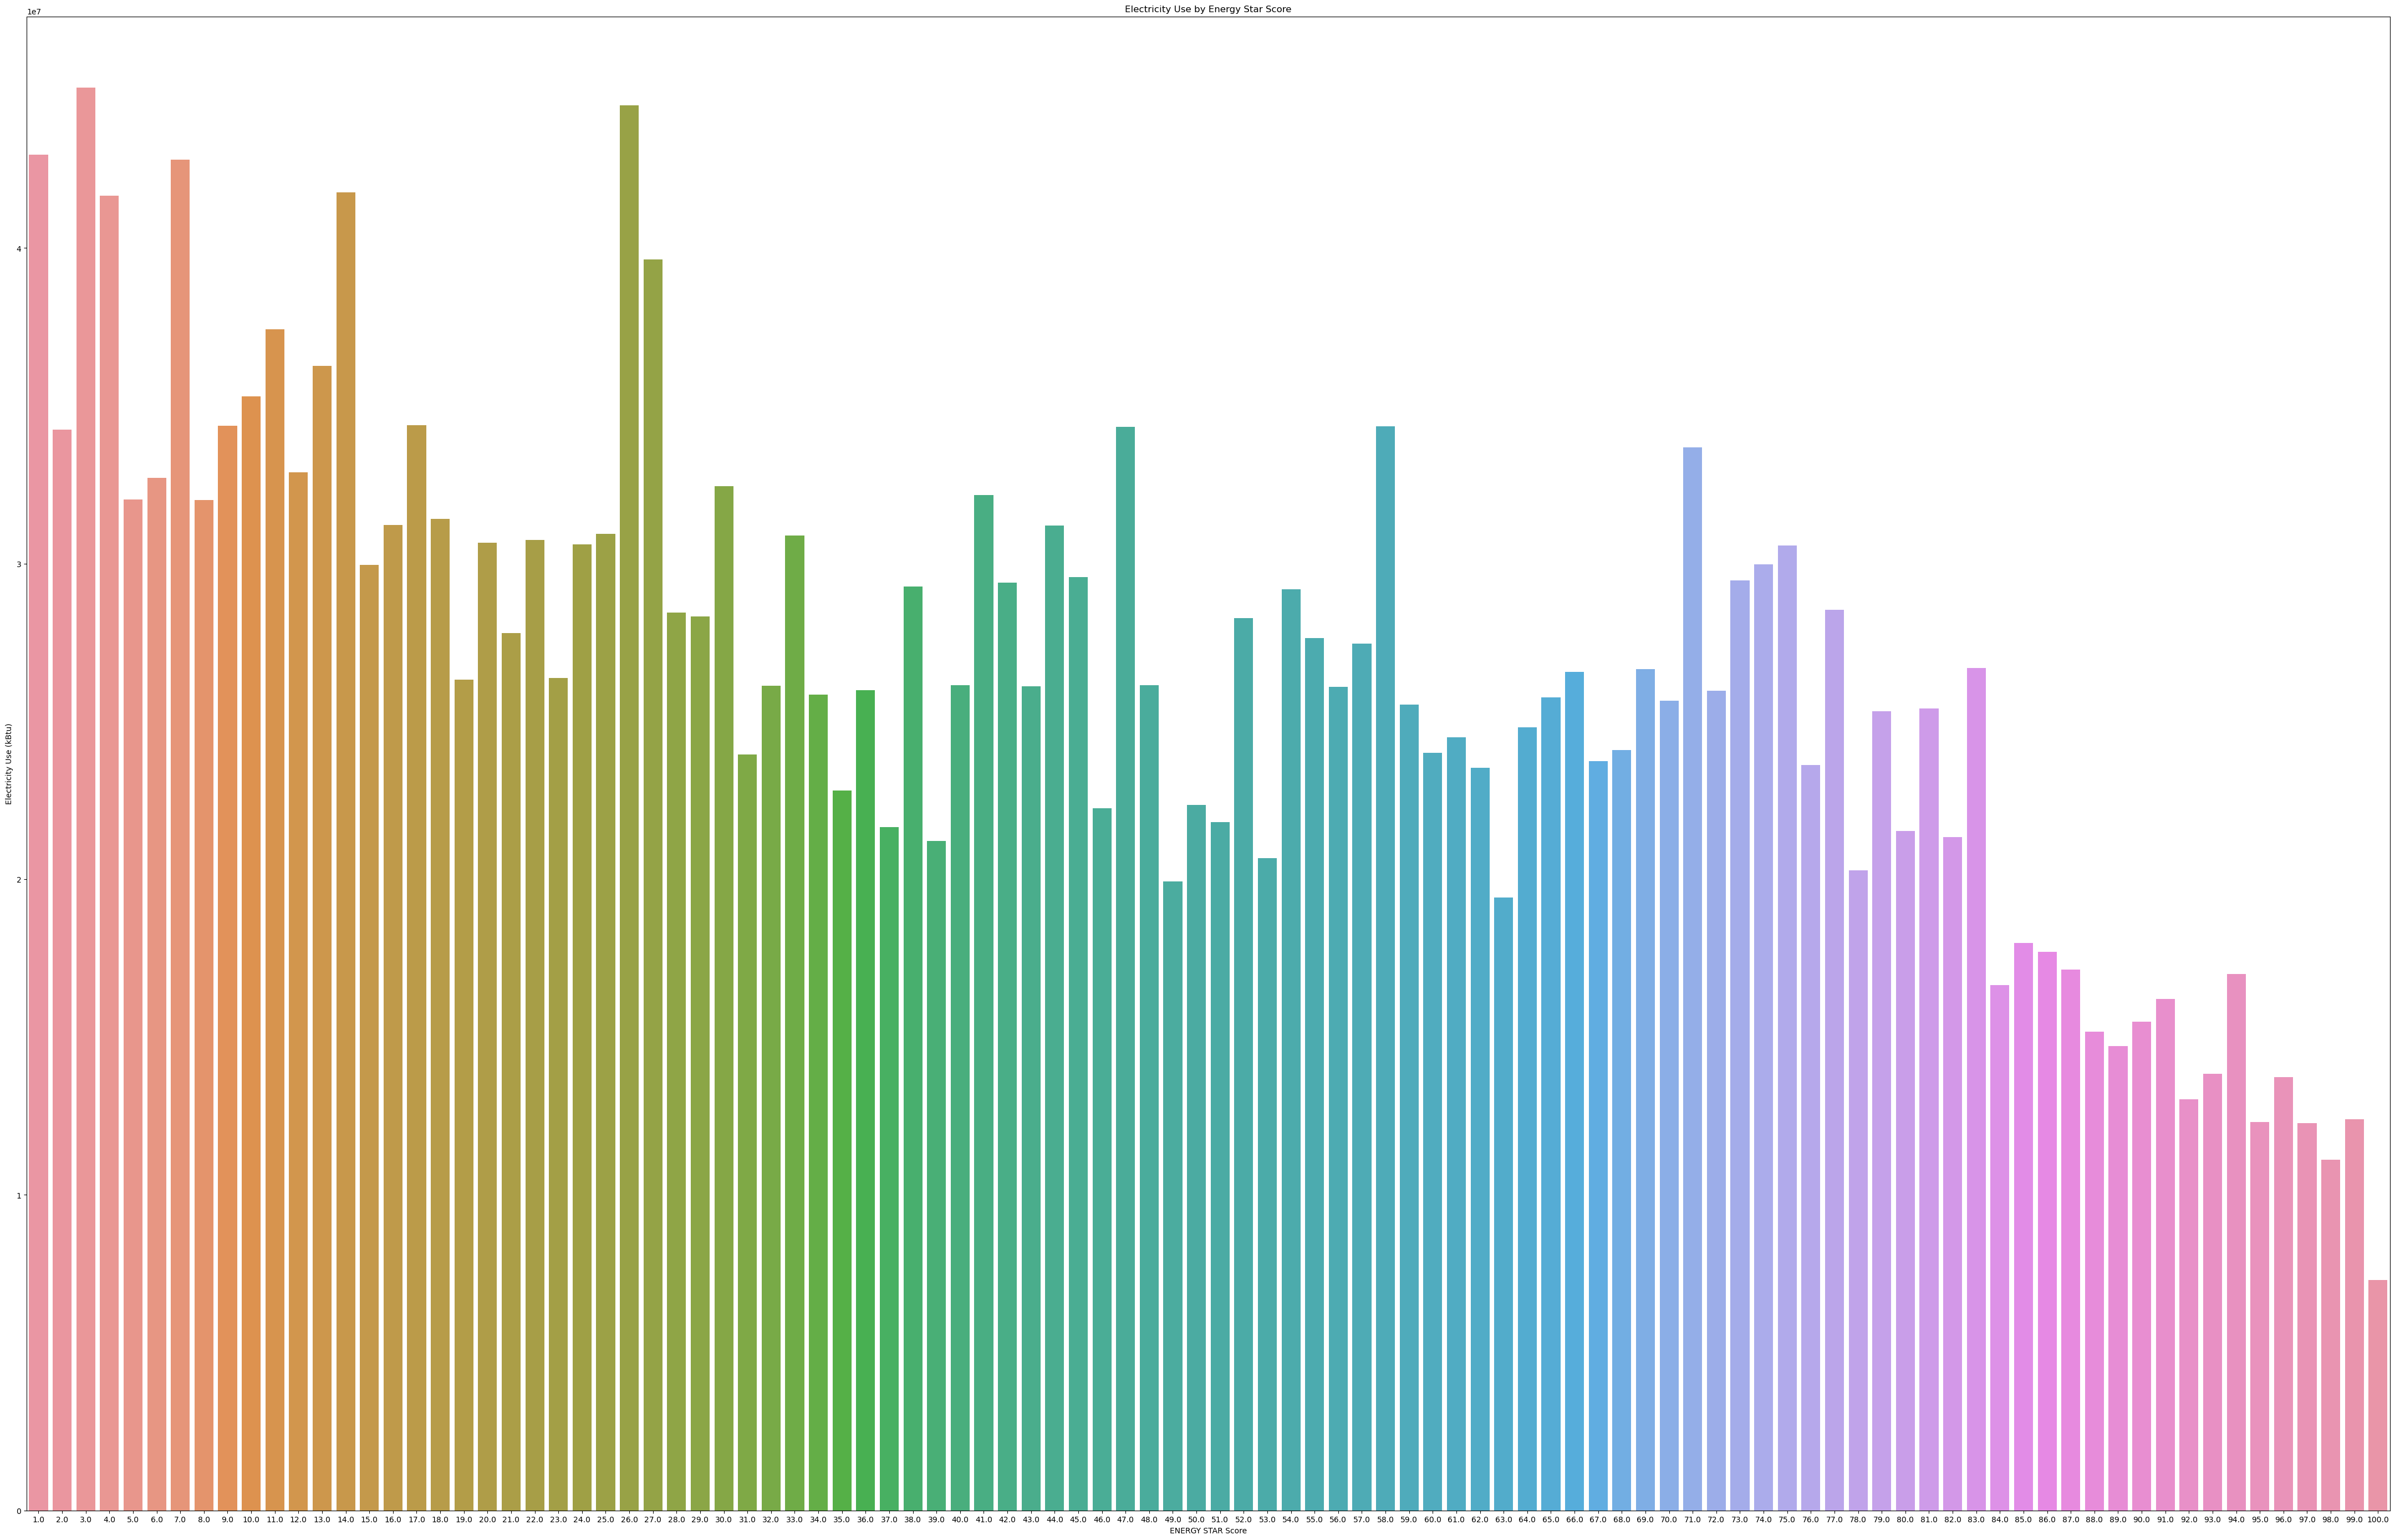

In [28]:
plt.figure(figsize=(55,35))
sns.barplot(x="ENERGY STAR Score", y="Electricity Use (kBtu)", data=data1)
plt.xlabel("ENERGY STAR Score")
plt.ylabel("Electricity Use (kBtu)")
plt.title("Electricity Use by Energy Star Score")

#Energy Star Score mülklere verilen 0-100 arası puanlar olup enerji tasarrufu miktarlarını gösterir.

#Görünüşe göre Energy Star Score 75-100 arasında olduğunda elektrik kullanımı düşmekte. Energy Star Score tanımından da yola çıkacak olursak 0-50 arası skor diğer mülklere göre karşılaştırılınca kötü enerji tasarrufu, 50-75 skorunda ise orta enerji tasarrufu, 75-100 arasında ise iyi enerji tasarrufu yapar şeklinde tanımlanır.

In [29]:
#Doğal gaz kullanımının energy star score ile ilişkisine bakalım.
data2 = df.groupby("ENERGY STAR Score")[["Natural Gas Use (kBtu)"]].median().reset_index()
data2

,ENERGY STAR Score,Natural Gas Use (kBtu)
0,1.0,76515061.0
1,2.0,42189428.5
2,3.0,49709858.5
3,4.0,53460001.0
4,5.0,44001999.0
...,...,...
95,96.0,28235006.5
96,97.0,28616166.0
97,98.0,26594945.0
98,99.0,27908226.0


Text(0.5, 1.0, 'Natural Gas Use by Energy Star Score')

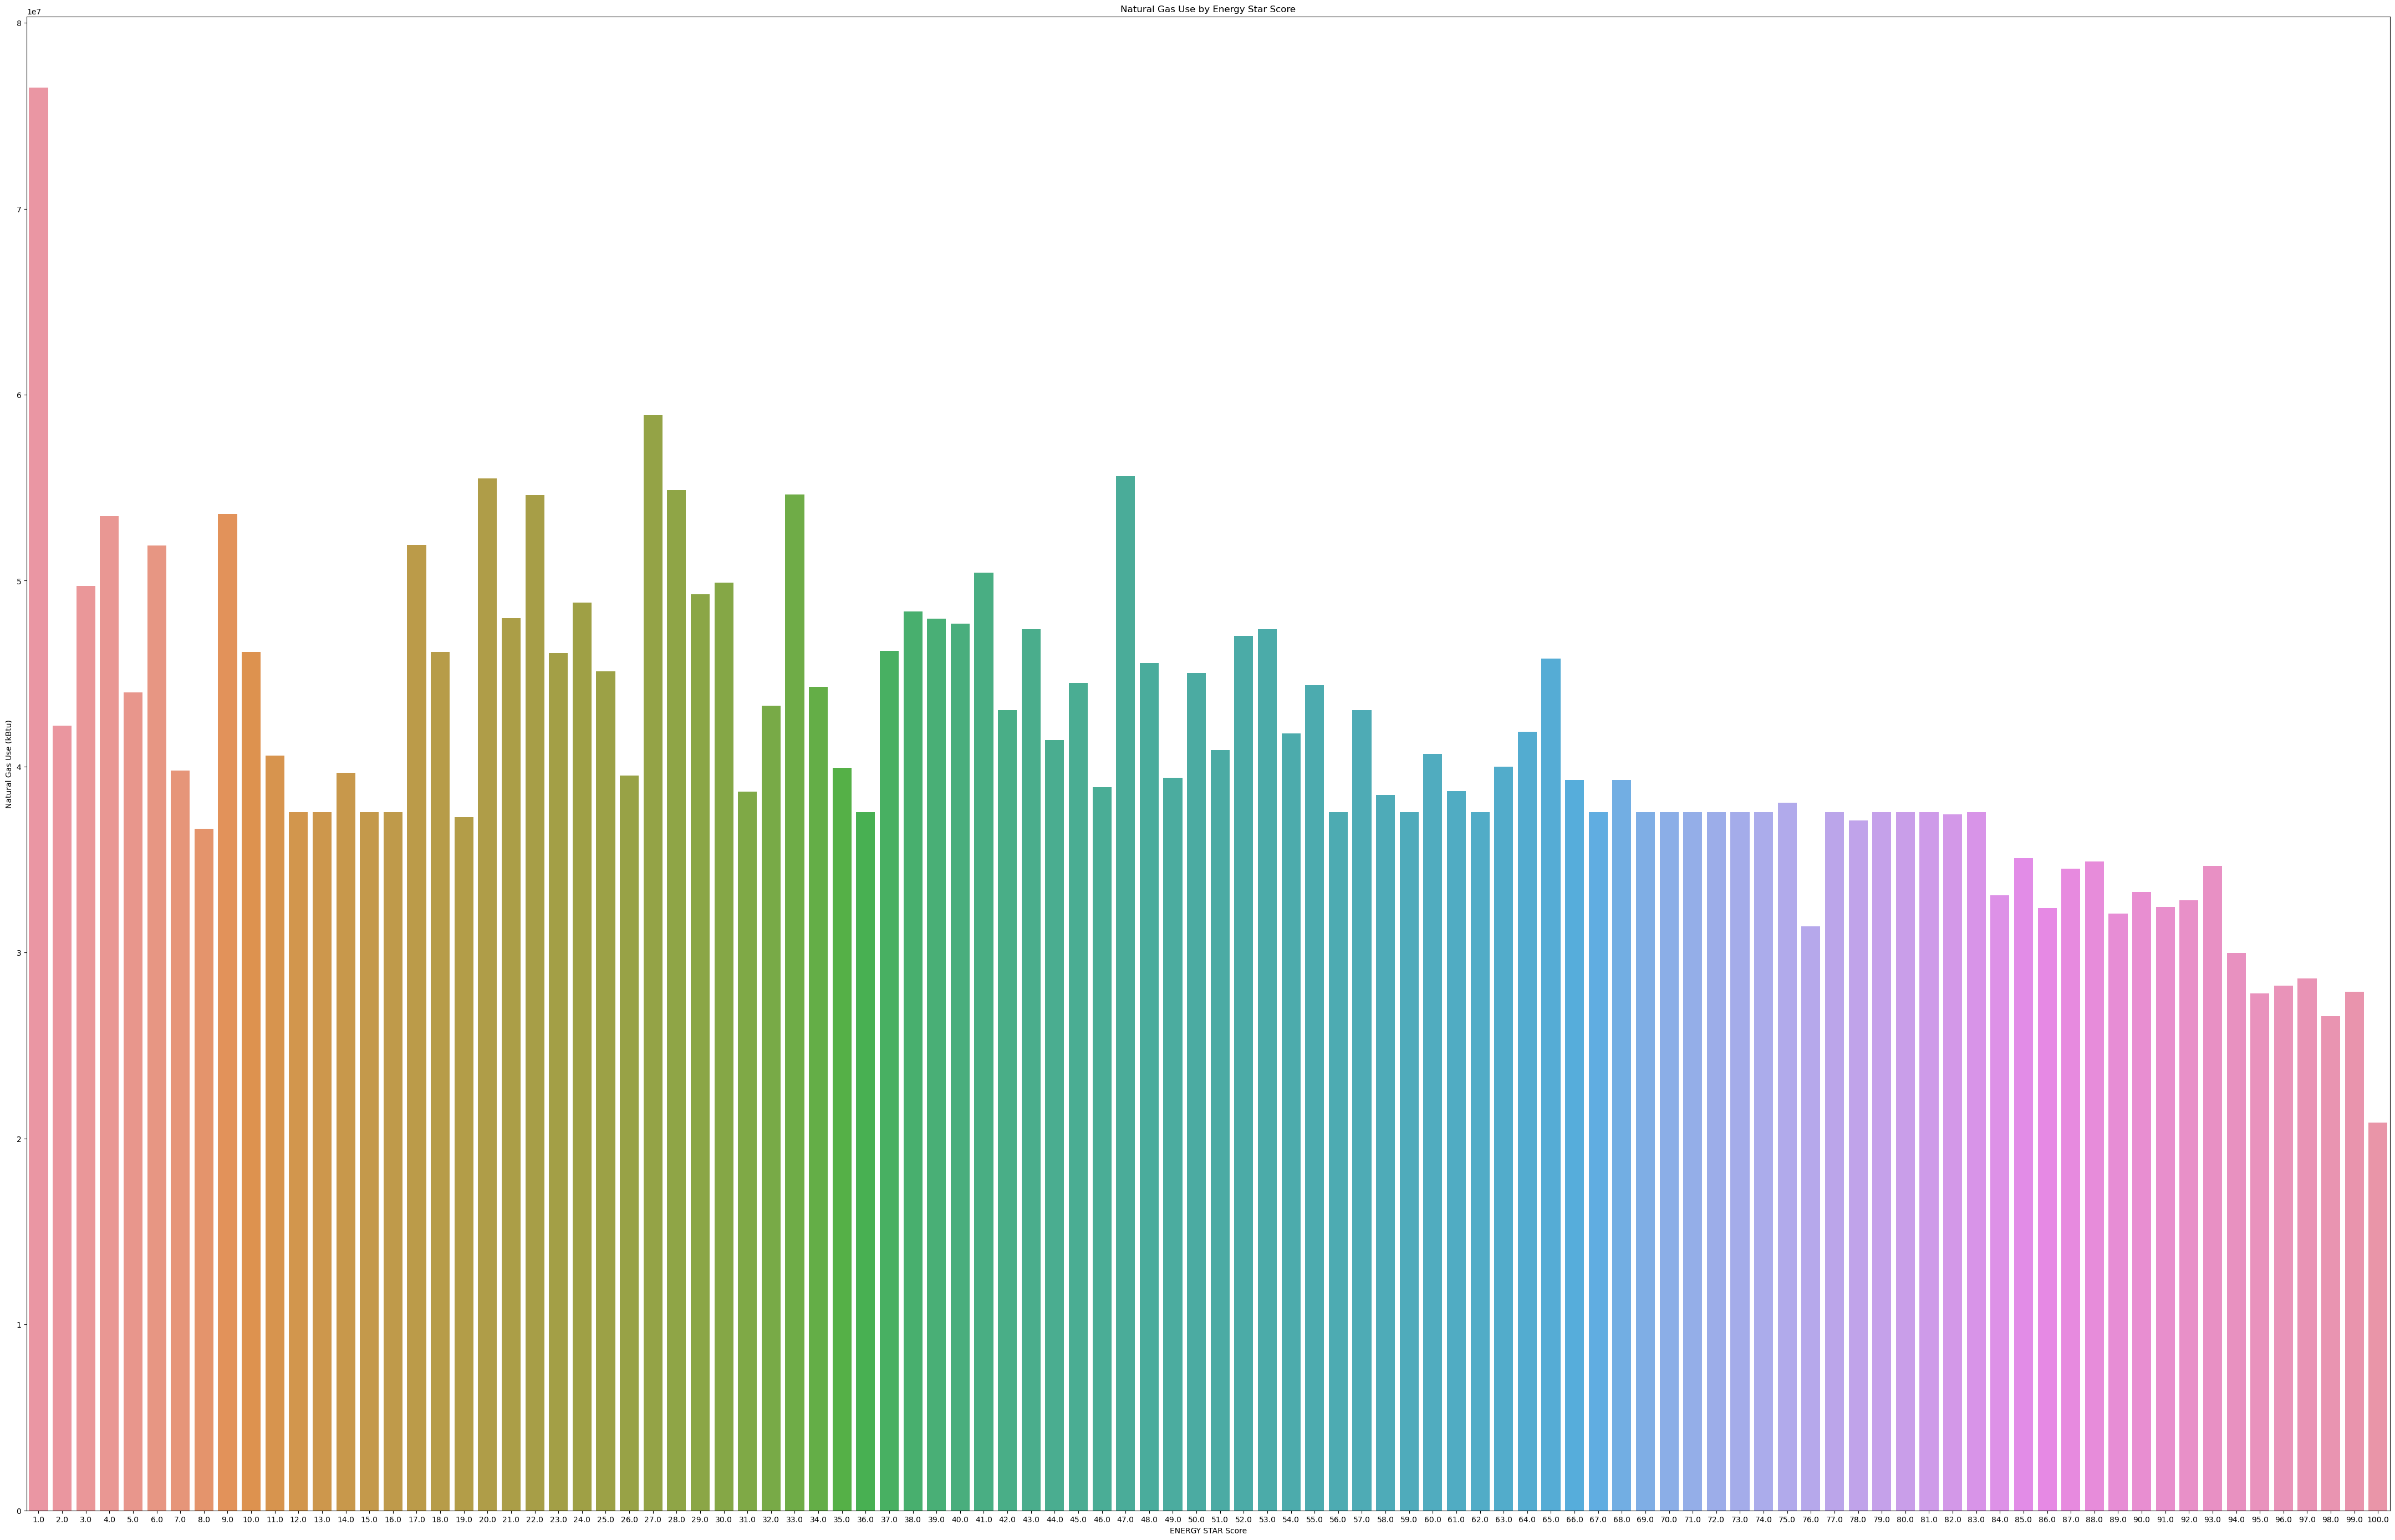

In [30]:
plt.figure(figsize=(55,35))
sns.barplot(x="ENERGY STAR Score", y="Natural Gas Use (kBtu)", data=data2)
plt.xlabel("ENERGY STAR Score")
plt.ylabel("Natural Gas Use (kBtu)")
plt.title("Natural Gas Use by Energy Star Score")

#Görüldüğü üzere energy star score 75-100 arasındayken doğal gaz kullanımı da düşüyor.

In [31]:
#energy star scoreu en yüksek olan binaların inşaa edilme yılına bakalım.
data3 = df.loc[df["ENERGY STAR Score"] >= 75 ][["Year Built","ENERGY STAR Score"]]
data3

,Year Built,ENERGY STAR Score
4,1908.0,100.0
8,1966.0,75.0
15,2013.0,81.0
17,1916.0,75.0
21,1920.0,79.0
...,...,...
24874,1984.0,97.0
24882,2008.0,100.0
24883,1996.0,93.0
24887,1928.0,85.0


Text(0.5, 1.0, 'Energy Star Score by Building Year')

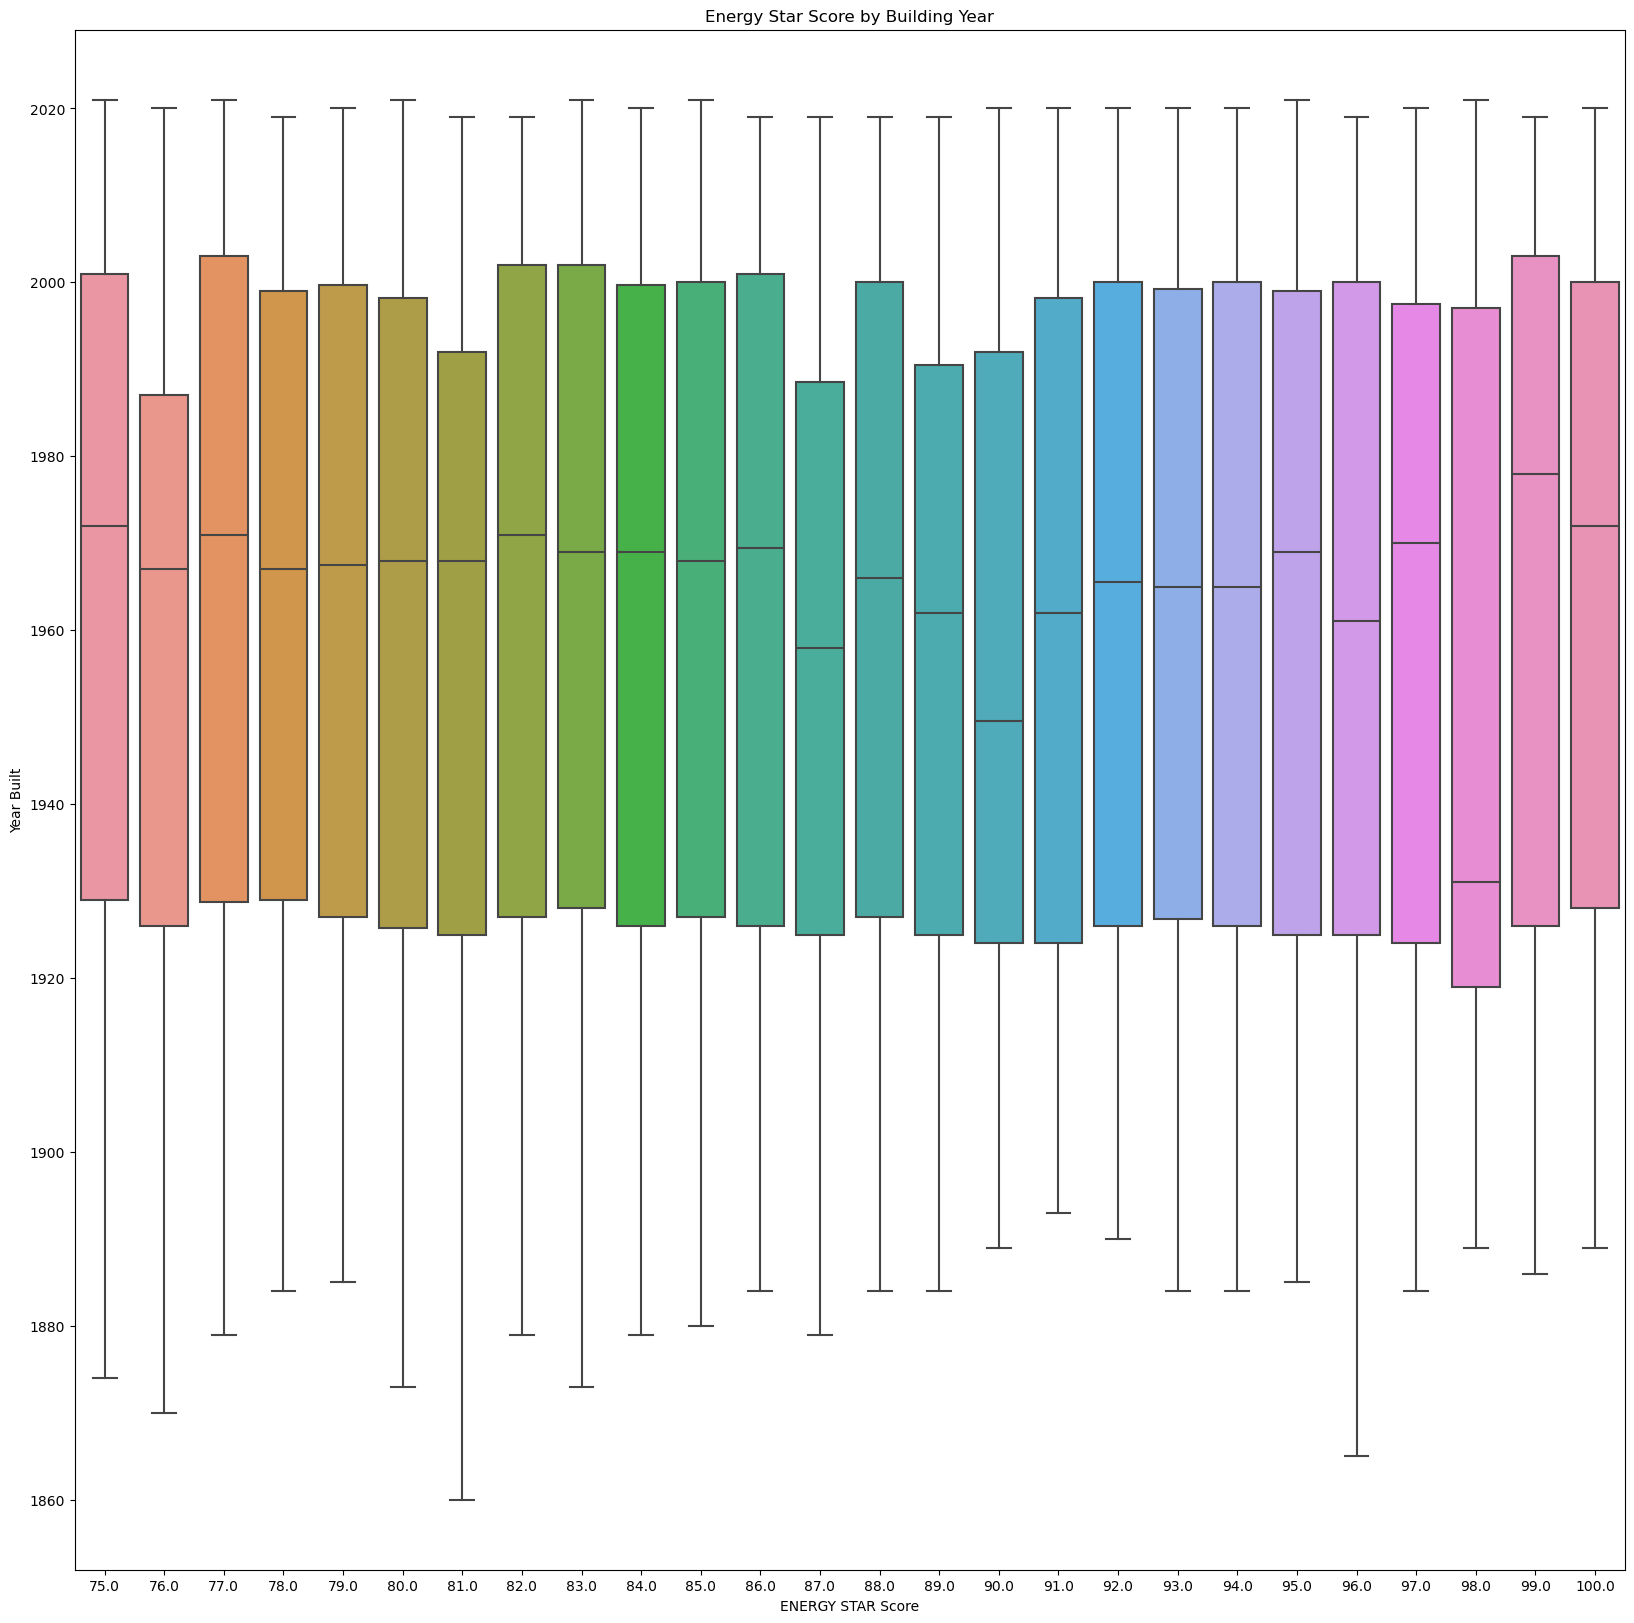

In [32]:
plt.figure(figsize=(20,20))
sns.boxplot(x="ENERGY STAR Score", y="Year Built",data=data3)
plt.xlabel("ENERGY STAR Score")
plt.ylabel("Year Built")
plt.title("Energy Star Score by Building Year")

In [33]:
#toplam sera gazı emisyonlarının(karbondioksit) ilişkisine bakalım.
data4 = df.groupby("ENERGY STAR Score")[["Total GHG Emissions (Metric Tons CO2e)"]].mean().reset_index()
data4

,ENERGY STAR Score,Total GHG Emissions (Metric Tons CO2e)
0,1.0,59463.710900
1,2.0,38384.353659
2,3.0,20602.715909
3,4.0,20413.675676
4,5.0,26715.070423
...,...,...
95,96.0,9746.884615
96,97.0,8683.014218
97,98.0,6779.081081
98,99.0,7069.918819


Text(0.5, 1.0, 'Energy Star Score by Total GHG Emissions')

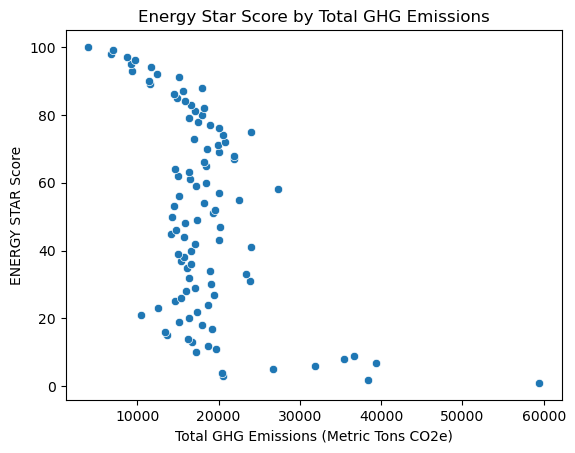

In [34]:
sns.scatterplot(x="Total GHG Emissions (Metric Tons CO2e)", y="ENERGY STAR Score", data=data4)
plt.xlabel("Total GHG Emissions (Metric Tons CO2e)")
plt.ylabel("ENERGY STAR Score")
plt.title("Energy Star Score by Total GHG Emissions")